## Feature Engineering - Machine Learning Modeling - Classification

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as ss
import itertools

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400.0,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160.0,900,1947,0,98166,47.4444,-122.351,2590,21891
2,1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460.0,0,1952,0,98166,47.4434,-122.347,2250,20023
3,2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010.0,420,1930,0,98168,47.4783,-122.265,1290,10320
4,3600057,20150319T000000,402500.0,4,2.00,1650,3504,1.0,0,0,...,7,760.0,890,1951,2013,98144,47.5803,-122.294,1480,3504


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21434 non-null  float64
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long  

In [5]:
for column in df.columns: 
    null_count = len(df[df[column].isna()])
print("{} : {}".format(column, null_count)) 

sqft_lot15 : 0


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [7]:
df.fillna(999, inplace=True) 

### Feature Selection & Get dummies

#### Transform Price to Binary

In [8]:
df['price'] = df['price'].apply(lambda value: value > 645000.00).astype(int)

#### Transform Basement to binary

In [9]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda value: value > 1).astype(int)

#### Housing Price over $650,000 is 1 for True and 0 for False

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20150422T000000,0,6,3.00,2400,9373,2.0,0,0,...,7,2400.0,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1200019,20140508T000000,1,4,1.75,2060,26036,1.0,0,0,...,8,1160.0,1,1947,0,98166,47.4444,-122.351,2590,21891
2,1200021,20140811T000000,0,3,1.00,1460,43000,1.0,0,0,...,7,1460.0,0,1952,0,98166,47.4434,-122.347,2250,20023
3,2800031,20150401T000000,0,3,1.00,1430,7599,1.5,0,0,...,6,1010.0,1,1930,0,98168,47.4783,-122.265,1290,10320
4,3600057,20150319T000000,0,4,2.00,1650,3504,1.0,0,0,...,7,760.0,1,1951,2013,98144,47.5803,-122.294,1480,3504


In [11]:
df.rename(columns={'price':'high_price'}, inplace=True)

In [12]:
df.columns

Index(['id', 'date', 'high_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Examine square footage of home apart from basement

In [13]:
stat = df.sqft_above.describe().round(2)
print(stat)

count    21436.00
mean      1790.89
std        829.06
min        290.00
25%       1200.00
50%       1560.00
75%       2220.00
max       9410.00
Name: sqft_above, dtype: float64


#### Transform sqft_above 75% to binary

In [14]:
df['sqft_above'] = df['sqft_above'].apply(lambda value: value > 2220).astype(int)

In [15]:
#create dummy variables for categorical features (X)
df_features = pd.get_dummies(df,columns=['sqft_living'])
df_features.head()

,id,date,high_price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,...,sqft_living_8000,sqft_living_8010,sqft_living_8020,sqft_living_8670,sqft_living_9200,sqft_living_9640,sqft_living_9890,sqft_living_10040,sqft_living_12050,sqft_living_13540
0,1000102,20150422T000000,0,6,3.00,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,1200019,20140508T000000,1,4,1.75,26036,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,1200021,20140811T000000,0,3,1.00,43000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2800031,20150401T000000,0,3,1.00,7599,1.5,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,3600057,20150319T000000,0,4,2.00,3504,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


#### Create (DV) The y matrics from dataframe where y=high_price

#### Create (IV) The X matrics from dataframe

In [16]:
#set target and drop unuseful columns
y = df_features['high_price']
df_features = pd.concat([df, df_features], axis=1).drop('sqft_living', axis=1)
X = df_features.drop('high_price', axis=1)

#### Drop the following columns because they do not contribute towards making predictions

In [17]:
X = X.drop(['id','date','lat','long'], axis=1)

In [18]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,sqft_living_8000,sqft_living_8010,sqft_living_8020,sqft_living_8670,sqft_living_9200,sqft_living_9640,sqft_living_9890,sqft_living_10040,sqft_living_12050,sqft_living_13540
0,6,3.00,9373,2.0,0,0,3,7,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.75,26036,1.0,0,0,4,8,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1.00,43000,1.0,0,0,3,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.00,7599,1.5,0,0,4,6,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2.00,3504,1.0,0,0,3,7,0,1,...,0,0,0,0,0,0,0,0,0,0


## Predictive Models

Load Machine Learning Libraries

Apply the following Classification models

* Random Forest
* K nearest neighbors

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Split the X and y into 70/30 training and testing data subsets

In [20]:
#train test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=42)

## Feature Scaling For Standardization

In [21]:
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Training a Random Forrest

In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))

[[4609  166]
 [ 464 1192]]


#### Accuracy of our model is equal 90 %.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4775
           1       0.88      0.72      0.79      1656

    accuracy                           0.90      6431
   macro avg       0.89      0.84      0.86      6431
weighted avg       0.90      0.90      0.90      6431



## Training a K Nearest Neighbors

In [26]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

#### Print the train and test scores for each iteration.

In [27]:
print(test_scores)
print(train_scores)

[0.8126263411600062, 0.8148032965324211, 0.835795366194993, 0.8263100606437568, 0.8343958948841549, 0.824133105271342, 0.8292645000777484, 0.8165137614678899, 0.8211786658373503]
[1.0, 0.8951682772409197, 0.9026324558480506, 0.869843385538154, 0.8755081639453516, 0.8558480506497834, 0.8590469843385539, 0.8435854715094968, 0.8454515161612796]


#### Identify the number of neighbors that resulted in the max score in the training dataset.

In [28]:
max_score = max(train_scores)
print('The Max train_score:',"{:.0%}".format(max_score))

The Max train_score: 100%


#### Identify the number of neighbors that resulted in the max score in the testing dataset.

In [29]:
max_tscore = max(test_scores)
print('The Max test_score:',"{:.0%}".format(max_tscore))

The Max test_score: 84%


#### Plot the train and test model performance by number of neighbors.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


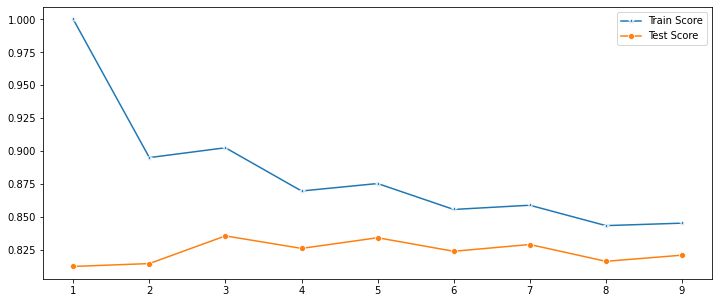

In [30]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

#### Fit and score the best number of neighbors based on the plot.

In [31]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8172912455294666

#### Plot the confusion matrix for the model fit above.

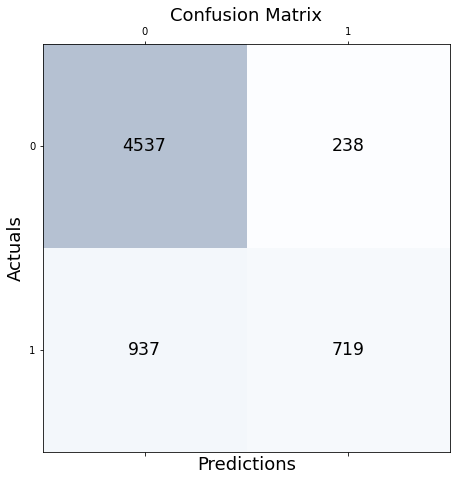

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### NOTE: Confusion Matrix Break down

N = 6431

TN & FN is the Predicted NO

FP & TP is the Predicted YES

Accuracy:
    (TN+TP)/N
    (4537 + 719)/6431 = 82%
    
Misclassification Rate:
    (FP +FN)/N
    (937 + 238)/6431 = 0.18%

### Print the classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4775
           1       0.75      0.43      0.55      1656

    accuracy                           0.82      6431
   macro avg       0.79      0.69      0.72      6431
weighted avg       0.81      0.82      0.80      6431



In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

### Print the best score and best parameter for n_neighbors.

In [35]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8066342970243255
Best Parameters: {'n_neighbors': 20}


In [36]:
from sklearn.model_selection import GridSearchCV

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': np.arange(1,50)}]
# Search for best hyperparameters
grid = GridSearchCV(knn, param_grid=hp_candidates, scoring='r2')
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             scoring='r2')

In [37]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

-0.031662590409298155
KNeighborsClassifier(n_neighbors=20)
{'n_neighbors': 20}


In [38]:
print("Best Score:" + str(knn_cv.best_score_))

Best Score:0.8066342970243255


Summary:
    Scaling the features, generating new features with KNN model with hyperparameter tuning led to the most accurate predictions with the least missclassification. The result was a score of 82% accuracy.
This model can be used as a guide when determining house price estimates for Seattle since it leads to reasonable predictions.

In [ ]:
See link to: Housing Marketing Regression Model : 